<a href="https://colab.research.google.com/github/sherlockieee/cs156/blob/main/assignment_7/CS156_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1

In [20]:
import random
import numpy as np
import os

np.random.seed(2022)

In [5]:
os.chdir('/content/drive/My Drive/CS156/symbol')
files = os.listdir()
files

['language-training-langA-17',
 'language-training-langC-10',
 'language-training-langA-28',
 'language-training-langB-3',
 'language-training-langC-14',
 'language-training-langA-7',
 'language-training-langC-1',
 'language-training-langB-16',
 'language-training-langB-14',
 'language-training-langB-26',
 'language-training-langA-26',
 'language-training-langC-5',
 'language-training-langA-9',
 'language-training-langA-25',
 'language-training-langB-11',
 'language-training-langA-15',
 'language-training-langB-0',
 'language-training-langB-13',
 'language-training-langB-10',
 'language-training-langC-11',
 'language-training-langC-18',
 'language-training-langC-16',
 'language-training-langB-6',
 'language-training-langA-13',
 'language-training-langB-23',
 'language-training-langC-2',
 'language-training-langA-3',
 'language-training-langC-3',
 'language-training-langB-7',
 'language-training-langC-6',
 'language-training-langB-20',
 'language-training-langC-7',
 'language-training-l

In [6]:
langA = [f for f in files if "langA" in f]
langB = [f for f in files if "langB" in f]
langC = [f for f in files if "langC" in f]
test = [f for f in files if "test" in f]
print(len(langA))

30


In [10]:
from collections import defaultdict

all_chars = ["A", "o", "e", "t", "p", "g", "k"]
initial_val = 0.01

def parse_text(lang):
    words = []
    for f in lang:
        with open(f, 'r') as f:
            words.append(f.read())
    return words
def initial_distribution(words):
    d = defaultdict(int)
    for word in words:
        d[word[0]] += 1
    return [d[key]/len(words) for key in sorted(d.keys())]


def get_idx(key, all_chars = all_chars):
    return all_chars.index(key)


def get_transition_matrix(words, all_chars = all_chars, initial_val = initial_val):
    #get all unique characters
    n = len(all_chars)
    M = [[initial_val]*n for _ in range(n)]
    for word in words:
        for (char_i,char_j) in zip(word,word[1:]):
            i, j = get_idx(char_i), get_idx(char_j)
            M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M


def get_markov_model(lang):
    words = parse_text(lang)
    initial_dist = initial_distribution(words)
    transition_matrix = get_transition_matrix(words)
    return initial_dist, transition_matrix

markov_A = get_markov_model(langA)
markov_B = get_markov_model(langB)
markov_C = get_markov_model(langC)
print(markov_B)

([0.16666666666666666, 0.13333333333333333, 0.2, 0.1, 0.2, 0.1, 0.1], [[0.024072654006345198, 0.28870645195242606, 0.04061226637797525, 0.3007352609499752, 0.02858345738042612, 0.2826920474536515, 0.034597861879200685], [0.41631341836637714, 0.057045640314026654, 0.4334214077974414, 0.051342977170338554, 1.900887714562701e-05, 0.041838538597525045, 1.900887714562701e-05], [0.01978617933255187, 0.3135424463682969, 0.029672207550100978, 0.32484076433121023, 0.036733656276921774, 0.2528139873176381, 0.022610758823280182], [0.4014950197870266, 0.05737281816965225, 0.4722312501194869, 0.036343128070812705, 1.9117900089854135e-05, 0.03251954805284188, 1.9117900089854135e-05], [0.03860188208181295, 0.30747071250240066, 0.05780679854042636, 0.24985596312656047, 0.019396965623199546, 0.30747071250240066, 0.019396965623199546], [0.45249078508839696, 0.05078685412850112, 0.4083474959719249, 0.05078685412850112, 2.2071644558236038e-05, 0.03754386739355949, 2.2071644558236038e-05], [0.0234501973531

In [12]:
def classify(test, models):
    prior_prob = 1/(len(models))

    probs = [None for _ in range(len(models))]
    for model_idx, (init_dist, transition) in enumerate(models):
        prob = init_dist[get_idx(test[0])]
        for i in range(1, len(test)):
            cur_idx = get_idx(test[i])
            prev_idx = get_idx(test[i - 1])
            prob *= transition[cur_idx][prev_idx]
        probs[model_idx] = prob
    probs = [prob/sum(probs) for prob in probs]
    return probs

models = [markov_A, markov_B, markov_C]

def get_name(idx):
    return "A" if idx == 0 else "B" if idx == 1 else "C"

test_words = parse_text(test)
for t in test_words:
    probs = classify(t, models)
    print(f"Probability distribution for {t} = {probs}.")
    print(f"Predicted classes = {get_name(probs.index(max(probs)))}")
    print()

Probability distribution for gooooAAAAAAAAAkkkkkkooooAAAeppppppgeeeeepAAppeektetttgggogptttttttkppAAAApetAeegggtttteetttttppAAAAA = [1.9743717318264567e-67, 9.495624931546695e-94, 1.0].
Predicted classes = C

Probability distribution for kteoeoeoAoteoAgeoetoegAgeoekgeteoegetetAgeAoAttAtAteoAtetotAoAoeooegegAoetgeoAtegtAteteoAtAgegAgeAoA = [2.557392726710199e-53, 1.0, 4.921753552418561e-54].
Predicted classes = B

Probability distribution for okopottogttpetgopopotkepeppAgAgetpotpAtgookettgoketkokAgAttpgopAgtkAggAgekottgokAkopApAkopAtgtttpokp = [1.0, 4.105079574121763e-55, 2.672315133246733e-18].
Predicted classes = A

Probability distribution for oeeoppppppoooAgggggoAAoookkppeoAApeoAkAAAAAAApkpppgpppkkkkAAAAkkkkeeepeeeeeekktppppkeegggoooooooooAA = [3.52639727398868e-81, 4.432607125906688e-83, 1.0].
Predicted classes = C

Probability distribution for tgAkoggAggAtpetkpAgegAgkepepookepepekogokogetkekekekegegotgekAAkoAtpottktkApAgtpegAkAgAkpopettgApogA = [1.0, 2.800988234327821e-55, 1.46679

Part 2

In [15]:
sound = str(np.loadtxt('https://course-resources.minerva.kgi.edu/uploaded_files/mke/n705lY/speaker', dtype=str))

sound

'eoggeggAeggepgpppoppogopppgoppoopegAAoAAAtAtttooepooppteeeeotpopppeeoepooopopgoooepoepotpoegogggggkeggpogopopeAtAttAoApAtttAggeAgegettttAAAAtoeeggeteoAopopotoktttpoepegpgtgAgAeeppeoooopgeggpAAAAgAtgegogoeepAtAtAAotAAAtttAtkAAAtAAktAAAtttAtAAoAtteeoopoAoAtoAAtAAApgeoeeeeoeeegteoAopeAkopgpeAgetAeeotAttAAeAAktttkAptAetAttAkAAAttAAkAAAttAAAAgAgkgogppgooApkpoAopopptotegoAppppAgettgtteAtttAAttAtpoooopopkeogeeettgtAAttAtAtttpopptoAokpopooooAooeoopopptoopgpAAootAtgtpgeeeeegegeAkeAgtoAoAooepgeegegeegekeegtoAAttttttggeegkeegggetgggggeggegeAgpoooktoppoopApoooAtAeAgegegoegeAgpeotppogpoppppoppoppoootAtAAAtApopoopooooopopppopoppoottoopopookAtAAAtettApAtttooAAtteeoAttppeAgtpeegoeeAtoAteeAeeppopekotktetppgpkgktopAAtkkgegttAAtoopopkeAApgoAotteegegeogkoggpAggpkAgAttttAAtAttAteeeopoetAttAtkeoAopgtAtktgtgttopooppgopppppppopeooAptoopopAookApoggtpttttoAoppoopAppoAoppooppptpAooppppppoooAAAtttttttAtteegggeeoeegeoeggkettkAAoAkAAteeggggkAgAtpAAAttAtAAAptAeppAAAopppAApkeeokpeegpppekpegeeeteoopoApoookoogggegekop

In [18]:
!pip install hmmlearn
from hmmlearn import hmm

     |████████████████████████████████| 129 kB 14.0 MB/s 


In [40]:
txt_arr = [c for c in sound]
print(txt_arr)
text_idx = [[get_idx(val)] for val in txt_arr]
print(text_idx)

['e', 'o', 'g', 'g', 'e', 'g', 'g', 'A', 'e', 'g', 'g', 'e', 'p', 'g', 'p', 'p', 'p', 'o', 'p', 'p', 'o', 'g', 'o', 'p', 'p', 'p', 'g', 'o', 'p', 'p', 'o', 'o', 'p', 'e', 'g', 'A', 'A', 'o', 'A', 'A', 'A', 't', 'A', 't', 't', 't', 'o', 'o', 'e', 'p', 'o', 'o', 'p', 'p', 't', 'e', 'e', 'e', 'e', 'o', 't', 'p', 'o', 'p', 'p', 'p', 'e', 'e', 'o', 'e', 'p', 'o', 'o', 'o', 'p', 'o', 'p', 'g', 'o', 'o', 'o', 'e', 'p', 'o', 'e', 'p', 'o', 't', 'p', 'o', 'e', 'g', 'o', 'g', 'g', 'g', 'g', 'g', 'k', 'e', 'g', 'g', 'p', 'o', 'g', 'o', 'p', 'o', 'p', 'e', 'A', 't', 'A', 't', 't', 'A', 'o', 'A', 'p', 'A', 't', 't', 't', 'A', 'g', 'g', 'e', 'A', 'g', 'e', 'g', 'e', 't', 't', 't', 't', 'A', 'A', 'A', 'A', 't', 'o', 'e', 'e', 'g', 'g', 'e', 't', 'e', 'o', 'A', 'o', 'p', 'o', 'p', 'o', 't', 'o', 'k', 't', 't', 't', 'p', 'o', 'e', 'p', 'e', 'g', 'p', 'g', 't', 'g', 'A', 'g', 'A', 'e', 'e', 'p', 'p', 'e', 'o', 'o', 'o', 'o', 'p', 'g', 'e', 'g', 'g', 'p', 'A', 'A', 'A', 'A', 'g', 'A', 't', 'g', 'e', 'g',

In [41]:
# using HMM multinomial for 3 speakers
model = hmm.MultinomialHMM(n_components=3, n_iter=1000, init_params="e")

#for transmission matrix, since people switch after 10 words
# there's a 0.9 probability of staying as the current speaker
# there's a 0.05 probability of switching to each speaker (0.10/2)
transition = np.array([[0.90, 0.05, 0.05],
                        [0.05, 0.90, 0.05],
                        [0.05, 0.05, 0.90]])

model.transmat_ = transition
model.fit(text_idx)
cur_x = model.score(text_idx)

print(cur_x)
X = model.predict_proba(text_idx)
print(X)

-1647.3761752853293
[[1.00000000e+00 3.60904194e-20 3.58707840e-30]
 [9.61542429e-01 3.36831191e-02 4.77445171e-03]
 [9.94731666e-01 4.20611914e-03 1.06221495e-03]
 ...
 [1.23413031e-01 8.69411254e-01 7.17571512e-03]
 [3.77224138e-02 9.59550559e-01 2.72702762e-03]
 [3.41420463e-02 9.57447216e-01 8.41073770e-03]]


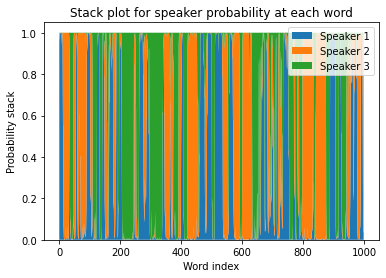

In [49]:
import matplotlib.pyplot as plt

# mapping outcome to word
word_idx = [i for i in range(len(sound))]
outcome = {f"Speaker {i+1}": list(X.T[i]) for i in range(3)}

plt.stackplot(word_idx, outcome.values(),
             labels=outcome.keys())
plt.legend()
plt.title('Stack plot for speaker probability at each word')
plt.xlabel('Word index')
plt.ylabel('Probability stack')

plt.show()